# Data ScienceTutorial for Beginners
<b>Pokemon- Weedle's Cave</b>

# 4- Pandas Foundation
* Building data frames from scratch
* Visual exploratory data analysis
* Statistical explatory data analysis
* Indexing pandas time series
* Resampling pandas time series

Note:<br>
* single column = series<br>
* NaN = not a number<br>
* dataframe.values = numpy<br>

# BUILDING DATA FRAMES FROM SCRATCH
* We can build data frames from csv as we did earlier.
* Also we can build dataframe from dictionaries
   * <b>zip() method:</b> This function returns a list of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables.
* Adding new column
* Broadcasting: Create new column and assign a value to entire column

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [2]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


<br><br><b> Adım adım kodlarımızı inleresek;</b>

In [3]:
# data frames from dictionary
country = ["Spain","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
list_col

[['Spain', 'France'], ['11', '12']]

country ve population adında iki tane liste oluşturuyoruz. Ardından data framede kullanmak için list_label yani column namelerini oluştururuz. Daha sonra ilk başta oluşturmuş olduğumuz iki listeyi list_col adında bir dizide birleştiririz.

In [4]:
zipped = list(zip(list_label,list_col))
zipped

[('country', ['Spain', 'France']), ('population', ['11', '12'])]

Bu adımdan sonra list_label ve list_col zipleyip listeye çeviririz. 

In [5]:
data_dict = dict(zipped)
data_dict

{'country': ['Spain', 'France'], 'population': ['11', '12']}

Bu listeyi dictionary olarak data_dict variablena atarız. 

In [6]:
df = pd.DataFrame(data_dict)
df

,country,population
0,Spain,11
1,France,12


Son adımda ise pandas kütüphanesinin DataFrame methodunu kullanarak data_dict'i dataframe çevirmiş oluruz.<br><br>

In [7]:
# Add new columns
df["capital"] = ["madrid","paris"]
df

,country,population,capital
0,Spain,11,madrid
1,France,12,paris


In [8]:
# Broadcasting
df["income"] = 0 #Broadcasting entire column
df

,country,population,capital,income
0,Spain,11,madrid,0
1,France,12,paris,0


# VISUAL EXPLORATORY DATA ANALYSIS
* Plot
* Subplot
* Histogram:
  * bins: number of bins
  * range(tuble): min and max values of bins
  * normed(boolean): normalize or not
  * cumulative(boolean): compute cumulative distribution

In [9]:
data = pd.read_csv('Dataset/archive/pokemon.csv')

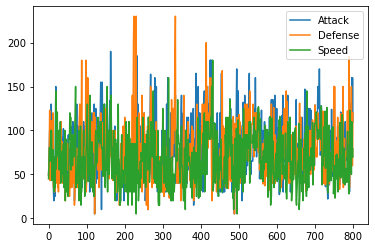

In [10]:
# Plotting all data 
data1 = data.loc[:,["Attack","Defense","Speed"]]
data1.plot()
# it is confusing

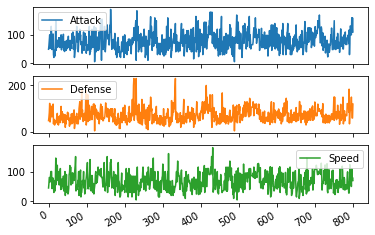

In [11]:
# subplots
data1.plot(subplots = True)
plt.show()

<br><br><b>HATIRLATMA</b><br><br>
<b>Example</b>

In [12]:
# importing pandas as pd
import pandas as pd
  
# Creating the DataFrame
df = pd.DataFrame({'Weight':[45, 88, 56, 15, 71],
                   'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'],
                   'Age':[14, 25, 55, 8, 21]})
  
# Create the index
index_ = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']
  
# Set the index
df.index = index_
  
# Print the DataFrame
print(df)

       Weight    Name  Age
Row_1      45     Sam   14
Row_2      88  Andrea   25
Row_3      56    Alex   55
Row_4      15   Robin    8
Row_5      71     Kia   21


In [13]:
# return the value
result = df.loc['Row_2', 'Name']
  
# Print the result
print(result)

Andrea


<br><br><b>Example</b>

In [14]:
# importing pandas as pd
import pandas as pd
  
# Creating the DataFrame
df = pd.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[7, 2, 54, 3, None], 
                   "C":[20, 16, 11, 3, 8], 
                   "D":[14, 3, None, 2, 6]}) 
  
# Create the index
index_ = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5']
  
# Set the index
df.index = index_
  
# Print the DataFrame
print(df)

          A     B   C     D
Row_1  12.0   7.0  20  14.0
Row_2   4.0   2.0  16   3.0
Row_3   5.0  54.0  11   NaN
Row_4   NaN   3.0   3   2.0
Row_5   1.0   NaN   8   6.0


In [15]:
# return the values.
result = df.loc[:, ['A', 'D']]
  
# Print the result
print(result)

          A     D
Row_1  12.0  14.0
Row_2   4.0   3.0
Row_3   5.0   NaN
Row_4   NaN   2.0
Row_5   1.0   6.0


<br><br><br>

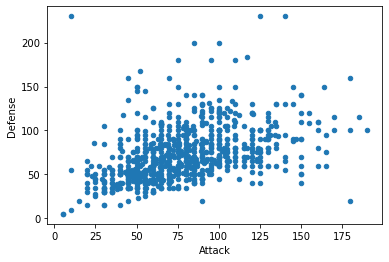

In [16]:
# scatter plot  
data1.plot(kind = "scatter",x="Attack",y = "Defense")
plt.show()

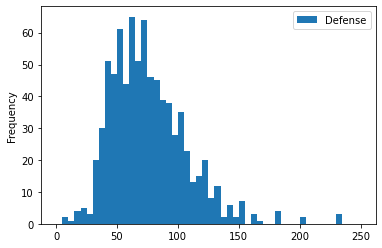

In [17]:
# hist plot  
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250))

<b>range():</b>y eksenimizin aralığı <br>
<b>normed:</b> True (Frekans değerini 0-1 arasında normalize etme), False

<module 'matplotlib.pyplot' from 'C:\\Users\\DELL\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

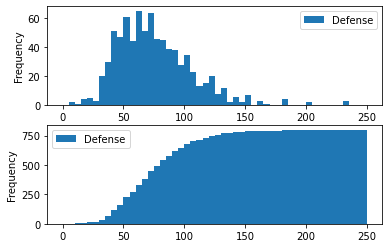

In [18]:
# histogram subplot with non cumulative and cumulative
fig, axes = plt.subplots(nrows=2,ncols=1)
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[0])
data1.plot(kind = "hist",y = "Defense",bins = 50,range= (0,250),ax = axes[1],cumulative = True)
plt.savefig('graph.png')
plt

<b>cumulative:</b> True (Bir önceki değerlerin toplamını alarak çizilir), False

# STATISTICAL EXPLORATORY DATA ANALYSIS

* <b>count:</b> number of entries
* <b>mean:</b> average of entries
* <b>std:</b> standart deviation
* <b>min:</b> minimum entry
* <b>25%:</b> first quantile
* <b>50%:</b> median or second quantile
* <b>75%:</b> third quantile
* <b>max:</b> maximum entry

In [19]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# INDEXING PANDAS TIME SERIES
<b>datetime</b> = object<br>
<b>parse_dates(boolean):</b> Transform date to ISO 8601 (yyyy-mm-dd hh:mm:ss ) format

In [22]:
time_list = ["1992-03-08","1992-04-12"]
print(type(time_list[1])) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(time_list)
print(type(datetime_object))

<class 'str'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


time_list'de tarihlerimiz bir string değişkeni formatındaydı. Pandasın <b>to_datetime()</b> methodunu kullanarak DateTime objesine dönüştürdük.

<br><br>Pokemon datasetimizde datetime bulunmadığı için biz kendimiz oluşturup dataset'e ekleyelim.

In [25]:
# close warning
import warnings
warnings.filterwarnings("ignore")

# In order to practice lets take head of pokemon data and add it a time list
data2 = data.head()
date_list = ["1992-01-10","1992-02-10","1992-03-10","1993-03-15","1993-03-16"]
datetime_object = pd.to_datetime(date_list)

data2["date"] = datetime_object

# lets make date as index
data2= data2.set_index("date")
data2 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-10,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1992-02-10,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
1992-03-10,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
1993-03-15,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
1993-03-16,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


<b>set_index()</b> methodunu kullanarak oluşturmuş olduğumuz date column ve değişkenlerini tablomuzun indexi haline getirik.

In [26]:
# Now we can select according to our date index
print(data2.loc["1993-03-16"])
print(data2.loc["1992-03-10":"1993-03-16"])

#                      5
Name          Charmander
Type 1              Fire
Type 2               NaN
HP                    39
Attack                52
Defense               43
Sp. Atk               60
Sp. Def               50
Speed                 65
Generation             1
Legendary          False
Name: 1993-03-16 00:00:00, dtype: object
            #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
date                                                                        
1992-03-10  3       Venusaur  Grass  Poison  80      82       83      100   
1993-03-15  4  Mega Venusaur  Grass  Poison  80     100      123      122   
1993-03-16  5     Charmander   Fire     NaN  39      52       43       60   

            Sp. Def  Speed  Generation  Legendary  
date                                               
1992-03-10      100     80           1      False  
1993-03-15      120     80           1      False  
1993-03-16       50     65           1      False  


# RESAMPLING PANDAS TIME SERIES¶
* <b>Resampling:</b> statistical method over different time intervals
    * Needs string to specify frequency like <b>"M"</b> = month or <b>"A"</b> = year
* <b>Downsampling:</b> reduce date time rows to slower frequency like from daily to weekly
* <b>Upsampling:</b> increase date time rows to faster frequency like from daily to hourly
* <b>Interpolate:</b> Interpolate values according to different methods like ‘linear’, ‘time’ or index’
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html

In [27]:
# We will use data2 that we create at previous part
data2.resample("A").mean()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-12-31,2.0,61.666667,64.333333,65.0,81.666667,81.666667,61.666667,1.0,False
1993-12-31,4.5,59.500000,76.000000,83.0,91.000000,85.000000,72.500000,1.0,False


Yukarıdaki kodda yıllara göre tüm özelliklerin ortalamasını aldık. Örneğin; 1992 yılında hız ortalması nedir sorusuna yıllara göre <b>resample()</b> methodunu ve ortalma içinde mean() methodunu kullanarak bulabiliriz.

In [28]:
# Lets resample with month
data2.resample("M").mean()
# As you can see there are a lot of nan because data2 does not include all months

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,0.0
1992-02-29,2.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,0.0
1992-03-31,3.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,0.0
1992-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# In real life (data is real. Not created from us like data2) we can solve this problem with interpolate
# We can interpolete from first value
data2.resample("M").first().interpolate("linear")

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,,,,
1992-01-31,1.000000,Bulbasaur,Grass,Poison,45.0,49.0,49.000000,65.000000,65.000000,45.0,1.0,0.0
1992-02-29,2.000000,Ivysaur,Grass,Poison,60.0,62.0,63.000000,80.000000,80.000000,60.0,1.0,0.0
1992-03-31,3.000000,Venusaur,Grass,Poison,80.0,82.0,83.000000,100.000000,100.000000,80.0,1.0,0.0
1992-04-30,3.083333,NaN,NaN,NaN,80.0,83.5,86.333333,101.833333,101.666667,80.0,1.0,0.0
1992-05-31,3.166667,NaN,NaN,NaN,80.0,85.0,89.666667,103.666667,103.333333,80.0,1.0,0.0
1992-06-30,3.250000,NaN,NaN,NaN,80.0,86.5,93.000000,105.500000,105.000000,80.0,1.0,0.0
1992-07-31,3.333333,NaN,NaN,NaN,80.0,88.0,96.333333,107.333333,106.666667,80.0,1.0,0.0
1992-08-31,3.416667,NaN,NaN,NaN,80.0,89.5,99.666667,109.166667,108.333333,80.0,1.0,0.0
1992-09-30,3.500000,NaN,NaN,NaN,80.0,91.0,103.000000,111.000000,110.000000,80.0,1.0,0.0


<b>interpolation()</b> datasetimizdeki NaN değerleri doldurmak için kullanabileceğimiz bir methottur. Yukarıdaki örnekte boşluklar linear bir şekilde doldurulmuştur. Yani 1,2,3,*,5,6 dizisinde * yerine linear interpolation ile 4 değişkeni ile doldururuz.

In [30]:
# Or we can interpolate with mean()
data2.resample("M").mean().interpolate("linear")

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
date,,,,,,,,,
1992-01-31,1.000,45.000000,49.0,49.0,65.00,65.00,45.000,1.0,0.0
1992-02-29,2.000,60.000000,62.0,63.0,80.00,80.00,60.000,1.0,0.0
1992-03-31,3.000,80.000000,82.0,83.0,100.00,100.00,80.000,1.0,0.0
1992-04-30,3.125,78.291667,81.5,83.0,99.25,98.75,79.375,1.0,0.0
1992-05-31,3.250,76.583333,81.0,83.0,98.50,97.50,78.750,1.0,0.0
1992-06-30,3.375,74.875000,80.5,83.0,97.75,96.25,78.125,1.0,0.0
1992-07-31,3.500,73.166667,80.0,83.0,97.00,95.00,77.500,1.0,0.0
1992-08-31,3.625,71.458333,79.5,83.0,96.25,93.75,76.875,1.0,0.0
1992-09-30,3.750,69.750000,79.0,83.0,95.50,92.50,76.250,1.0,0.0
